In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd

# define the fuction we need

In [2]:
def read_files(file_name):
    events = ak.from_parquet(file_name)
    return events
def read_files_uproot(file_name):
    events = uproot.open(file_name)
    return events
def count_events(events_name, var_name, mask, title_name):
    counts, bins, patches = plt.hist(events_name[var_name][mask], weights = events_name['weight_central'][mask])
    total_events = np.sum(counts)
    print(f"event name is:  {title_name} , total_events is: {total_events} ")
def plot_var(*var_arr,mask, weight, legend_name,bins):
    for i in range(len(var_arr)):
        plt.hist(var_arr[i][mask], weights = weight[mask], histtype="step", density=True, label=legend_name,bins=bins)
        plt.legend()
def delta_R_O(phi1, phi2):
    
    delta_phi = phi2 - phi1
    delta_eta = 0
    return np.sqrt(delta_phi**2 + delta_eta**2)

def delta_R(phi1, eta1, phi2, eta2):
    delta_phi = phi2 - phi1
    delta_eta = eta2 - eta1
    return np.sqrt(delta_phi**2 + delta_eta**2)
def get_min_phoID(lead_phoID, sublead_phoID):
    min_phoID = ak.where(lead_phoID,sublead_phoID, sublead_phoID > lead_phoID)    
    return min_phoID

In [42]:
# check the samples PN score distribution
#add 3 different bkg samples and ak.concatenate them
file_name_bkg = "/eos/user/z/zhenxuan/hhwwgg_parquet/calibration/TTJets_HT-2500toInf_TuneCP5_13TeV_2017/merged_nominal.parquet"
events_bkg = read_files(file_name_bkg)
file_name_bkg2 = "/eos/user/z/zhenxuan/hhwwgg_parquet/calibration/TTJets_HT-1200to2500_TuneCP5_13TeV_2017/merged_nominal.parquet"
events_bkg2 = read_files(file_name_bkg2)
file_name_bkg3 = "/eos/user/z/zhenxuan/hhwwgg_parquet/calibration/TTJets_HT-600to800_TuneCP5_13TeV_2017/merged_nominal.parquet"
events_bkg3 = read_files(file_name_bkg3)
events_bkg = ak.concatenate([events_bkg, events_bkg2, events_bkg3], axis=0)
# add signal samples
file_name_signal = "/eos/user/z/zhenxuan/hhwwgg_parquet/calibration/UL17_R_gghh_M-2200_2017/merged_nominal.parquet"
events_sig = read_files(file_name_signal)

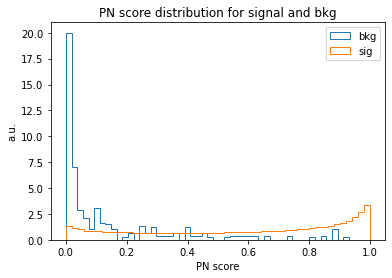

In [54]:
# write a function to plot the PN score distribution for signal and bkg
def plot_PN_score_signal_bkg(events_bkg, events_sig,variable):
    # add a mask to require the PN score > -999
    mask_bkg = (events_bkg[variable] > -999) & (events_bkg['fatjet_H_1_msoftdrop'] > 120)
    mask_sig = events_sig[variable] > -999 & (events_sig['fatjet_H_1_msoftdrop'] > 120)
    plt.hist(events_bkg[variable][mask_bkg], weights = events_bkg['weight_central'][mask_bkg], histtype="step", density=True, label="bkg",bins=50)
    plt.hist(events_sig[variable][mask_sig], weights = events_sig['weight_central'][mask_sig], histtype="step", density=True, label="sig",bins=50)
    plt.legend()
    plt.xlabel("PN score")
    plt.ylabel("a.u.")
    plt.title("PN score distribution for signal and bkg")
plot_PN_score_signal_bkg(events_bkg, events_sig,variable="fatjet_H_1_Hqqqq_vsQCDTop")
# plot_PN_score_signal_bkg(events_bkg, events_sig,variable="fatjet_H_1_Hqqqq_qqlv_vsQCDTop")
# plot_PN_score_signal_bkg(events_bkg, events_sig,variable="fatjet_H_1_Hlvqq_vsQCDTop")